# EXPERIMENT 05 ML

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# import warnings
import warnings
warnings.filterwarnings("ignore")

In [4]:
# We will use some methods from the sklearn module
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score


In [6]:
df = pd.read_csv("Student_Performance.csv")

In [11]:
numeric_df = df.select_dtypes(include=[float, int])  # Select only numeric columns
print(numeric_df.corr())


                                  Hours Studied  Previous Scores  Sleep Hours  \
Hours Studied                          1.000000        -0.012390     0.001245   
Previous Scores                       -0.012390         1.000000     0.005944   
Sleep Hours                            0.001245         0.005944     1.000000   
Sample Question Papers Practiced       0.017463         0.007888     0.003990   
Performance Index                      0.373730         0.915189     0.048106   

                                  Sample Question Papers Practiced  \
Hours Studied                                             0.017463   
Previous Scores                                           0.007888   
Sleep Hours                                               0.003990   
Sample Question Papers Practiced                          1.000000   
Performance Index                                         0.043268   

                                  Performance Index  
Hours Studied                         

In [17]:
print(df.describe())

       Hours Studied  Previous Scores   Sleep Hours  \
count   10000.000000     10000.000000  10000.000000   
mean        4.992900        69.445700      6.530600   
std         2.589309        17.343152      1.695863   
min         1.000000        40.000000      4.000000   
25%         3.000000        54.000000      5.000000   
50%         5.000000        69.000000      7.000000   
75%         7.000000        85.000000      8.000000   
max         9.000000        99.000000      9.000000   

       Sample Question Papers Practiced  Performance Index  
count                      10000.000000       10000.000000  
mean                           4.583300          55.224800  
std                            2.867348          19.212558  
min                            0.000000          10.000000  
25%                            2.000000          40.000000  
50%                            5.000000          55.000000  
75%                            7.000000          71.000000  
max             

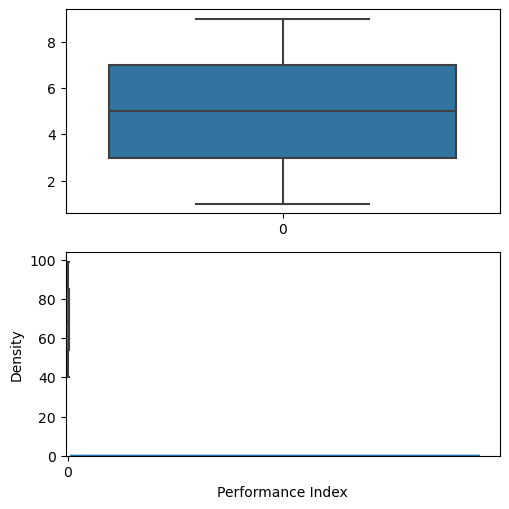

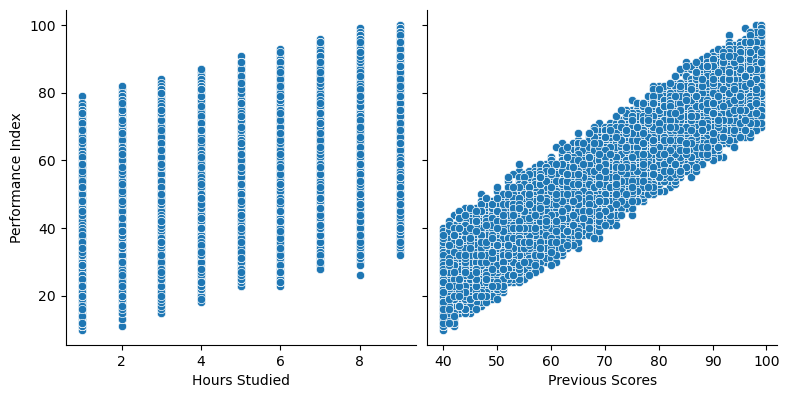

In [25]:
#Setting the value for X and Y
X = df[['Hours Studied', 'Previous Scores']]  # Use the exact column names from df.columns output
y = df['Performance Index']

fig, axs = plt.subplots(2, figsize = (5,5))
plt1 = sns.boxplot(df['Hours Studied'], ax = axs[0])
plt2 = sns.boxplot(df['Previous Scores'], ax = axs[1])
plt.tight_layout()

sns.distplot(df['Performance Index']);
sns.pairplot(df, x_vars=['Hours Studied', 'Previous Scores'], y_vars='Performance Index', height=4, aspect=1, kind='scatter')
plt.show()


In [26]:
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)
reg_model = linear_model.LinearRegression()

In [27]:
#Fitting the Multiple Linear Regression model
reg_model = LinearRegression().fit(X_train, y_train)
#Printing the model coefficients
print('Intercept: ',reg_model.intercept_)

Intercept:  -29.759696031285607


In [28]:
# pair the feature names with the coefficients
list(zip(X, reg_model.coef_))
#Predicting the Test and Train set result 
y_pred= reg_model.predict(X_test)  
x_pred= reg_model.predict(X_train) 
print("Prediction for test set: {}".format(y_pred))

Prediction for test set: [65.62826464 49.70329949 34.41417389 ... 71.9558614  35.22150241
 14.87645919]


In [29]:
#Actual value and the predicted value
reg_model_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred})
reg_model_diff
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

print('Mean Absolute Error:', mae)
print('Mean Square Error:', mse)
print('Root Mean Square Error:', r2)


Mean Absolute Error: 1.8372246647574144
Mean Square Error: 5.3409802420571
Root Mean Square Error: 2.3110560880379127


# PROGRAM 2 

In [30]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [31]:
# Load the dataset
df = pd.read_csv("Student_Performance.csv")

In [32]:
X = df[['Hours Studied', 'Previous Scores']]  # Use the exact column names from df.columns output
y = df['Performance Index']

In [37]:
print(df.dtypes)

Hours Studied                         int64
Previous Scores                       int64
Extracurricular Activities           object
Sleep Hours                           int64
Sample Question Papers Practiced      int64
Performance Index                   float64
dtype: object


In [38]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])  # Adjust as needed for your data types
print(numeric_df.corr())


                                  Hours Studied  Previous Scores  Sleep Hours  \
Hours Studied                          1.000000        -0.012390     0.001245   
Previous Scores                       -0.012390         1.000000     0.005944   
Sleep Hours                            0.001245         0.005944     1.000000   
Sample Question Papers Practiced       0.017463         0.007888     0.003990   
Performance Index                      0.373730         0.915189     0.048106   

                                  Sample Question Papers Practiced  \
Hours Studied                                             0.017463   
Previous Scores                                           0.007888   
Sleep Hours                                               0.003990   
Sample Question Papers Practiced                          1.000000   
Performance Index                                         0.043268   

                                  Performance Index  
Hours Studied                         

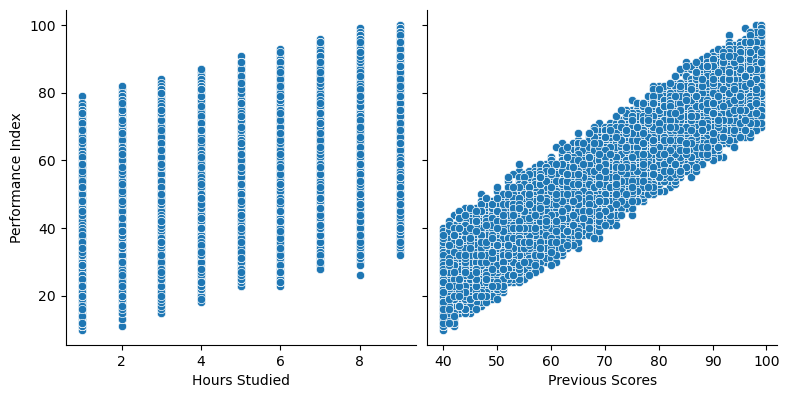

In [42]:
sns.pairplot(df, x_vars=['Hours Studied', 'Previous Scores'], y_vars='Performance Index', height=4, aspect=1, kind='scatter')
plt.show()

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

reg_model = linear_model.LinearRegression()
reg_model.fit(X_train, y_train)

print('Intercept:', reg_model.intercept_)
print('Coefficients:', reg_model.coef_)

Intercept: -29.605360900460035
Coefficients: [2.86449217 1.01615225]


In [44]:
y_pred = reg_model.predict(X_test)

mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)

print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)
print('R-squared:', r2)

Mean Absolute Error: 1.810143749236996
Mean Squared Error: 5.201346140631689
R-squared: 0.9859445764337783


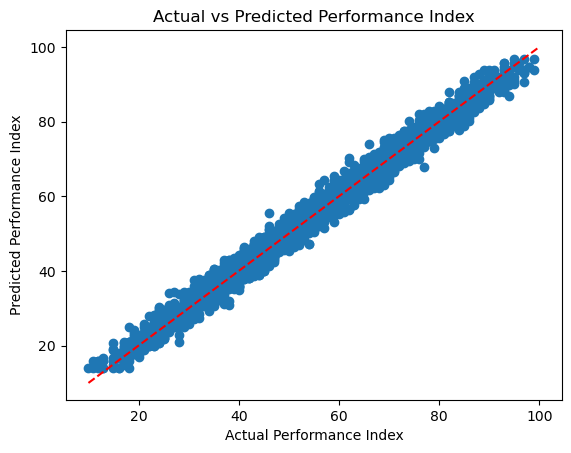

In [45]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Performance Index')
plt.ylabel('Predicted Performance Index')
plt.title('Actual vs Predicted Performance Index')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.show()